In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits
import healpy as hp
from astropy import wcs

from scipy.ndimage.filters import gaussian_filter
from pathlib import Path
# from multiprocessing import Pool

from scipy import stats

In [2]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
# surveyccd_path = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9m/survey-ccds-decam-dr9.fits.gz'
surveyccd_path = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9m/survey-ccds-90prime-dr9.fits.gz'
# surveyccd_path = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9m/survey-ccds-mosaic-dr9.fits.gz'

# image_path_list = glob.glob(os.path.join(image_dir, '*ooi*.fits.fz'))
ccd = Table(fitsio.read(surveyccd_path))

In [4]:
mask = ccd['ccd_cuts']==0
ccd = ccd[mask]

In [5]:
# Only keep unique exposures
_, idx = np.unique(ccd['expnum'], return_index=True)
ccd = ccd[idx]

In [6]:
ccdnum_list = [1, 2, 3, 4]
ccd_ra = [0.2813, 0.2813, -0.2813, -0.2813]
ccd_dec = [0.263, -0.263, 0.263, -0.263]

binsize = 8
pix_size = 0.454/3600*binsize
vrange = 1.

In [7]:
expnum_start, expnum_end = 79240047, 79240065
mask = (ccd['expnum']>=expnum_start) & (ccd['expnum']<=expnum_end)
idx = np.where(mask)[0]

In [8]:

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('plots2/90prime_images-all_ccds.pdf') as pdf:

    for ccd_index in idx:

        expnum = ccd['expnum'][ccd_index]
        band = ccd['filter'][ccd_index]
        print(ccd_index, band, expnum)
        fn = ccd['image_filename'][ccd_index]

        plt.figure(figsize=(14, 12))

        for ii, ccdnum in enumerate(ccdnum_list):

            try:
                img = fits.getdata('/global/cfs/cdirs/cosmo/staging/'+fn, extname='CCD'+str(ccdnum))
            except:
                print('Failure loading {}'.format('/global/cfs/cdirs/cosmo/staging/'+fn))
                continue

            ################ downsize image ################

            trim_size_x = img.shape[1] % binsize
            trim_size_y = img.shape[0] % binsize
            img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
            # to ignore NAN values, use np.nanmean
            img = np.nanmean(np.nanmean(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

            ################################################

            ysize, xsize = img.shape        
            ra, dec = ccd_ra[ii], ccd_dec[ii]

            # naive sky estimation
            mask = (img<np.percentile(img.flatten(), 95))
            median_sky = np.median(img[mask].flatten())
            img = img - median_sky

            img[~np.isfinite(img)] = 0
            # img = gaussian_filter(img, 4, mode='reflect', truncate=3)
            fig = plt.imshow(img.T, cmap='seismic', vmin=-vrange, vmax=vrange, 
                       extent=(ra+ysize*pix_size/2, ra-ysize*pix_size/2, dec-xsize*pix_size/2, dec+xsize*pix_size/2))

        plt.axis([0.55, -0.55, -0.55, 0.55])
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.colorbar(fraction=0.04, pad=0.04)
        plt.title('expnum={}  ccd_cuts={}  {}'.format(expnum, ccd['ccd_cuts'][ccd_index], fn))
        plt.tight_layout()
        # plt.savefig(os.path.join(plot_dir, os.path.basename(image_path).replace('.fits.fz', '.png')))
        pdf.savefig()
        plt.close()

22219 g 79240047
22220 g 79240048
22221 g 79240049
22222 g 79240050
22223 r 79240057
22224 r 79240058
22225 r 79240059
22226 r 79240060
22227 r 79240061
22228 r 79240062
22229 r 79240063
22230 r 79240064
22231 r 79240065


------------
## 79240047 - 79240050

22222 g 79240050


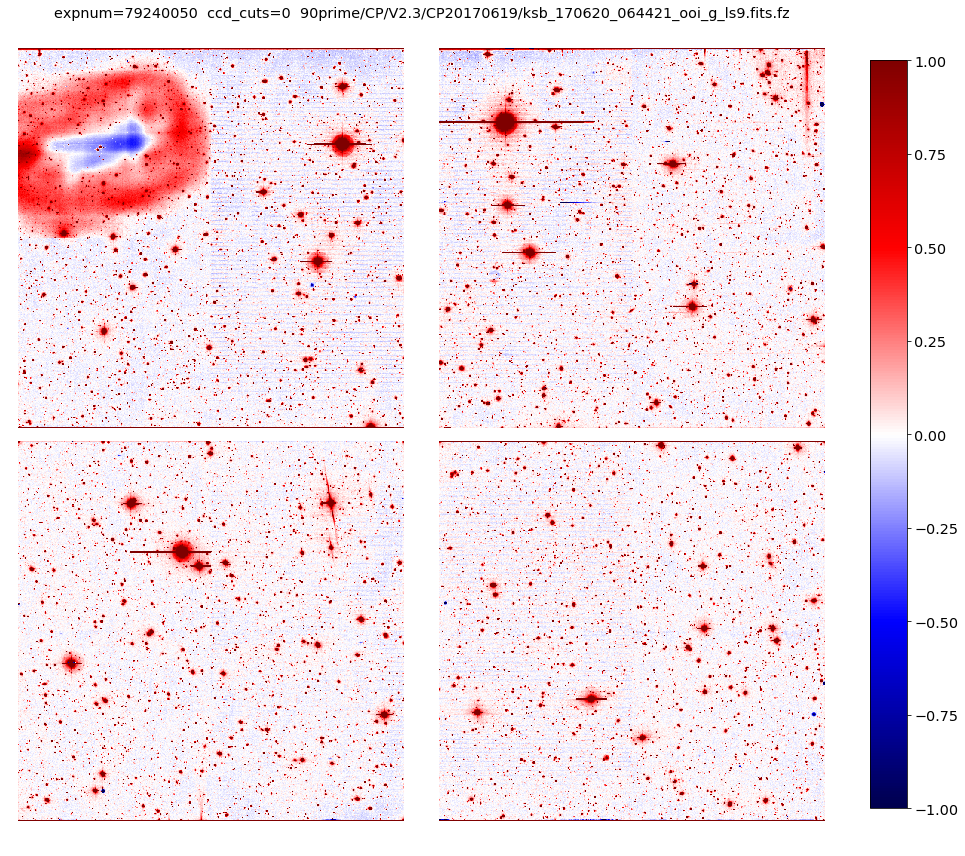

In [38]:
ccd_index = idx[3]

expnum = ccd['expnum'][ccd_index]
band = ccd['filter'][ccd_index]
print(ccd_index, band, expnum)
fn = ccd['image_filename'][ccd_index]

plt.figure(figsize=(14, 12))

for ii, ccdnum in enumerate(ccdnum_list):

    try:
        img = fits.getdata('/global/cfs/cdirs/cosmo/staging/'+fn, extname='CCD'+str(ccdnum))
    except:
        print('Failure loading {}'.format('/global/cfs/cdirs/cosmo/staging/'+fn))
        continue

    ################ downsize image ################

    trim_size_x = img.shape[1] % binsize
    trim_size_y = img.shape[0] % binsize
    img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
    # to ignore NAN values, use np.nanmean
    img = np.nanmean(np.nanmean(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

    ################################################

    ysize, xsize = img.shape        
    ra, dec = ccd_ra[ii], ccd_dec[ii]

    # naive sky estimation
    mask = (img<np.percentile(img.flatten(), 95))
    median_sky = np.median(img[mask].flatten())
    img = img - median_sky

    img[~np.isfinite(img)] = 0
    # img = gaussian_filter(img, 4, mode='reflect', truncate=3)
    fig = plt.imshow(img.T, cmap='seismic', vmin=-vrange, vmax=vrange, 
               extent=(ra+ysize*pix_size/2, ra-ysize*pix_size/2, dec-xsize*pix_size/2, dec+xsize*pix_size/2))

plt.axis([0.55, -0.55, -0.55, 0.55])
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.colorbar(fraction=0.04, pad=0.04)
plt.title('expnum={}  ccd_cuts={}  {}'.format(expnum, ccd['ccd_cuts'][ccd_index], fn))
plt.tight_layout()
# plt.savefig(os.path.join(plot_dir, os.path.basename(image_path).replace('.fits.fz', '.png')))
plt.show()

In [39]:
img = fits.getdata('/global/cfs/cdirs/cosmo/staging/'+fn, extname='CCD'+str(ccdnum))
print(img.shape)

(4096, 4032)


In [40]:
img.T.shape

(4032, 4096)

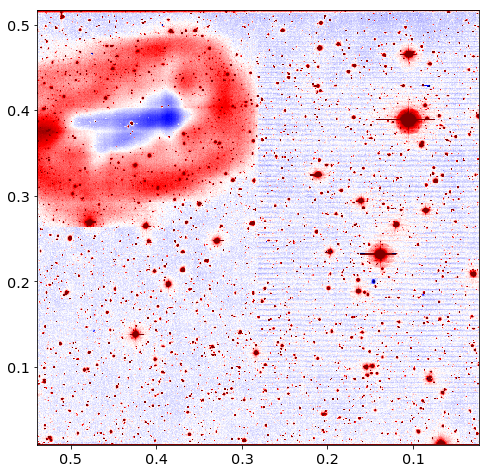

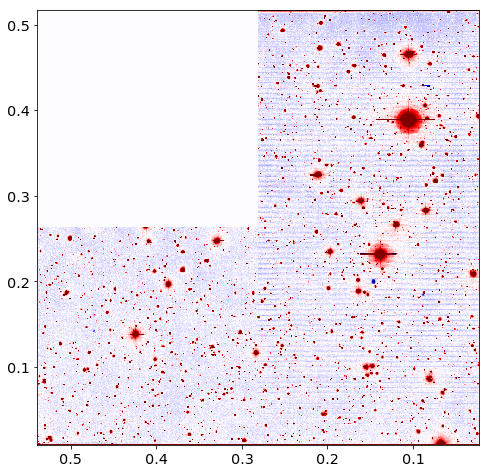

In [42]:
for ii, ccdnum in enumerate(np.array(ccdnum_list)[[0]]):

    try:
        img = fits.getdata('/global/cfs/cdirs/cosmo/staging/'+fn, extname='CCD'+str(ccdnum))
    except:
        print('Failure loading {}'.format('/global/cfs/cdirs/cosmo/staging/'+fn))
        continue

    # naive sky estimation
    mask = (img<np.percentile(img.flatten(), 95))
    median_sky = np.median(img[mask].flatten())
    img = img - median_sky
    
    img1 = img.copy()
    img1[:4096//2, :4032//2] = 0
    ################ downsize image ################

    trim_size_x = img.shape[1] % binsize
    trim_size_y = img.shape[0] % binsize
    img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
    # to ignore NAN values, use np.nanmean
    img = np.nanmean(np.nanmean(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)
    img1 = np.nanmean(np.nanmean(img1.reshape((img1.shape[0]//binsize, binsize, img1.shape[1]//binsize,-1)), axis=3), axis=1)

    ################################################

    ysize, xsize = img.shape        
    ra, dec = ccd_ra[ii], ccd_dec[ii]

    img[~np.isfinite(img)] = 0
    img1[~np.isfinite(img1)] = 0
    
    plt.figure(figsize=(8, 8))
    fig = plt.imshow(img.T, cmap='seismic', vmin=-vrange, vmax=vrange, 
               extent=(ra+ysize*pix_size/2, ra-ysize*pix_size/2, dec-xsize*pix_size/2, dec+xsize*pix_size/2))
    plt.show()
    
    plt.figure(figsize=(8, 8))
    fig = plt.imshow(img1.T, cmap='seismic', vmin=-vrange, vmax=vrange, 
               extent=(ra+ysize*pix_size/2, ra-ysize*pix_size/2, dec-xsize*pix_size/2, dec+xsize*pix_size/2))
    plt.show()

In [20]:
output_path = '/global/u2/r/rongpu/temp/90prime_junk/mask_1.npz'

data = {}

mask = np.zeros((4096, 4032), dtype=bool)
mask[:4096//2, :4032//2] = True
data['CCD1'] = mask

np.savez_compressed(output_path, **data)

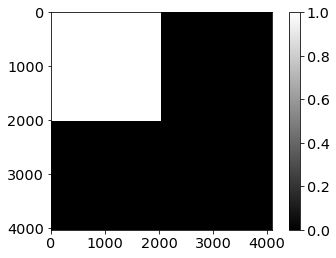

In [24]:
a = np.load(output_path)
plt.imshow(a['CCD1'].T, cmap='gray')
plt.colorbar()
plt.show()

------------
## 79240057 - 79240065

22223 r 79240057


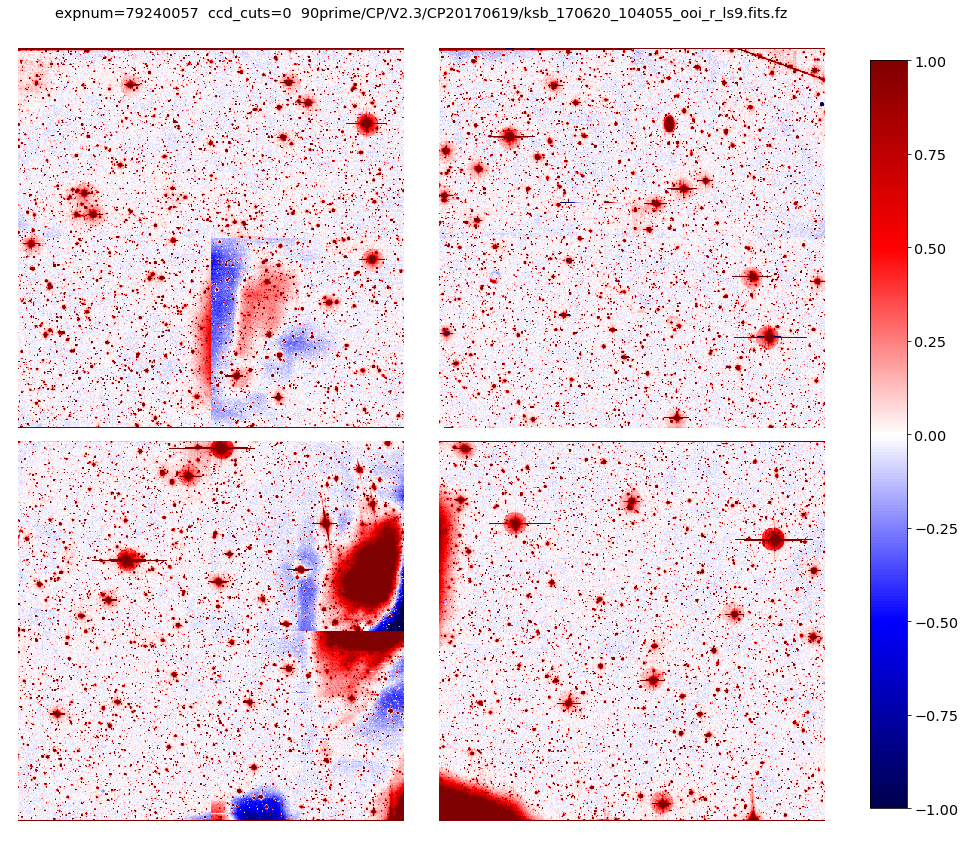

In [25]:
ccd_index = idx[4]

expnum = ccd['expnum'][ccd_index]
band = ccd['filter'][ccd_index]
print(ccd_index, band, expnum)
fn = ccd['image_filename'][ccd_index]

plt.figure(figsize=(14, 12))

for ii, ccdnum in enumerate(ccdnum_list):

    try:
        img = fits.getdata('/global/cfs/cdirs/cosmo/staging/'+fn, extname='CCD'+str(ccdnum))
    except:
        print('Failure loading {}'.format('/global/cfs/cdirs/cosmo/staging/'+fn))
        continue

    ################ downsize image ################

    trim_size_x = img.shape[1] % binsize
    trim_size_y = img.shape[0] % binsize
    img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
    # to ignore NAN values, use np.nanmean
    img = np.nanmean(np.nanmean(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

    ################################################

    ysize, xsize = img.shape        
    ra, dec = ccd_ra[ii], ccd_dec[ii]

    # naive sky estimation
    mask = (img<np.percentile(img.flatten(), 95))
    median_sky = np.median(img[mask].flatten())
    img = img - median_sky

    img[~np.isfinite(img)] = 0
    # img = gaussian_filter(img, 4, mode='reflect', truncate=3)
    fig = plt.imshow(img.T, cmap='seismic', vmin=-vrange, vmax=vrange, 
               extent=(ra+ysize*pix_size/2, ra-ysize*pix_size/2, dec-xsize*pix_size/2, dec+xsize*pix_size/2))

plt.axis([0.55, -0.55, -0.55, 0.55])
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.colorbar(fraction=0.04, pad=0.04)
plt.title('expnum={}  ccd_cuts={}  {}'.format(expnum, ccd['ccd_cuts'][ccd_index], fn))
plt.tight_layout()
# plt.savefig(os.path.join(plot_dir, os.path.basename(image_path).replace('.fits.fz', '.png')))
plt.show()

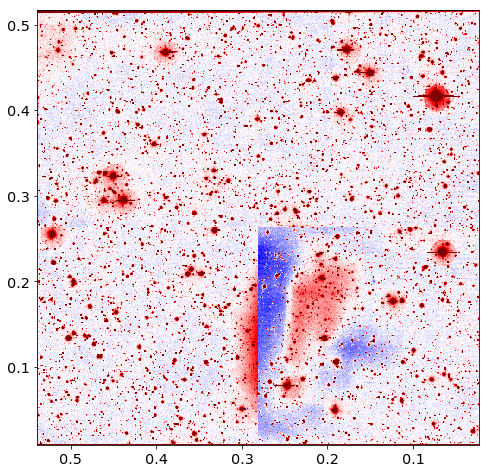

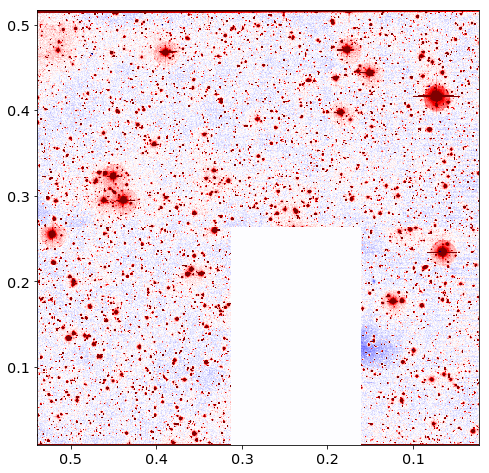

In [36]:
for ii, ccdnum in enumerate(np.array(ccdnum_list)[[0]]):

    try:
        img = fits.getdata('/global/cfs/cdirs/cosmo/staging/'+fn, extname='CCD'+str(ccdnum))
    except:
        print('Failure loading {}'.format('/global/cfs/cdirs/cosmo/staging/'+fn))
        continue

    # naive sky estimation
    mask = (img<np.percentile(img.flatten(), 95))
    median_sky = np.median(img[mask].flatten())
    img = img - median_sky
    
    img1 = img.copy()
    img1[1800:3000, 2016:] = 0
    ################ downsize image ################

    trim_size_x = img.shape[1] % binsize
    trim_size_y = img.shape[0] % binsize
    img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
    # to ignore NAN values, use np.nanmean
    img = np.nanmean(np.nanmean(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)
    img1 = np.nanmean(np.nanmean(img1.reshape((img1.shape[0]//binsize, binsize, img1.shape[1]//binsize,-1)), axis=3), axis=1)

    ################################################

    ysize, xsize = img.shape        
    ra, dec = ccd_ra[ii], ccd_dec[ii]

    img[~np.isfinite(img)] = 0
    img1[~np.isfinite(img1)] = 0
    
    plt.figure(figsize=(8, 8))
    fig = plt.imshow(img.T, cmap='seismic', vmin=-vrange, vmax=vrange, 
               extent=(ra+ysize*pix_size/2, ra-ysize*pix_size/2, dec-xsize*pix_size/2, dec+xsize*pix_size/2))
    plt.show()
    
    plt.figure(figsize=(8, 8))
    fig = plt.imshow(img1.T, cmap='seismic', vmin=-vrange, vmax=vrange, 
               extent=(ra+ysize*pix_size/2, ra-ysize*pix_size/2, dec-xsize*pix_size/2, dec+xsize*pix_size/2))
    plt.show()

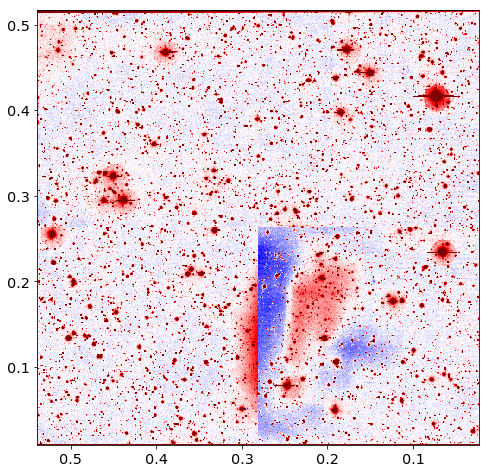

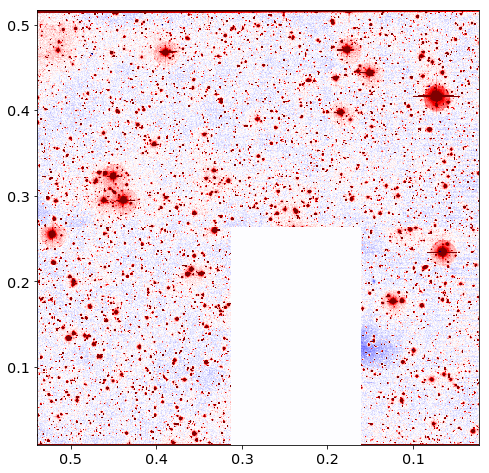

In [36]:
for ii, ccdnum in enumerate(np.array(ccdnum_list)[[2]]):

    try:
        img = fits.getdata('/global/cfs/cdirs/cosmo/staging/'+fn, extname='CCD'+str(ccdnum))
    except:
        print('Failure loading {}'.format('/global/cfs/cdirs/cosmo/staging/'+fn))
        continue

    # naive sky estimation
    mask = (img<np.percentile(img.flatten(), 95))
    median_sky = np.median(img[mask].flatten())
    img = img - median_sky
    
    img1 = img.copy()
    img1[3000:, 600:3000] = 0
    ################ downsize image ################

    trim_size_x = img.shape[1] % binsize
    trim_size_y = img.shape[0] % binsize
    img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
    # to ignore NAN values, use np.nanmean
    img = np.nanmean(np.nanmean(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)
    img1 = np.nanmean(np.nanmean(img1.reshape((img1.shape[0]//binsize, binsize, img1.shape[1]//binsize,-1)), axis=3), axis=1)

    ################################################

    ysize, xsize = img.shape        
    ra, dec = ccd_ra[ii], ccd_dec[ii]

    img[~np.isfinite(img)] = 0
    img1[~np.isfinite(img1)] = 0
    
#     plt.figure(figsize=(8, 8))
#     fig = plt.imshow(img.T, cmap='seismic', vmin=-vrange, vmax=vrange, 
#                extent=(ra+ysize*pix_size/2, ra-ysize*pix_size/2, dec-xsize*pix_size/2, dec+xsize*pix_size/2))
#     plt.show()
    
    plt.figure(figsize=(8, 8))
    fig = plt.imshow(img1.T, cmap='seismic', vmin=-vrange, vmax=vrange, 
               extent=(ra+ysize*pix_size/2, ra-ysize*pix_size/2, dec-xsize*pix_size/2, dec+xsize*pix_size/2))
    plt.show()

In [20]:
output_path = '/global/u2/r/rongpu/temp/90prime_junk/mask_2.npz'

data = {}

mask = np.zeros((4096, 4032), dtype=bool)
mask[:4096//2, :4032//2] = True
data['CCD1'] = mask

np.savez_compressed(output_path, **data)

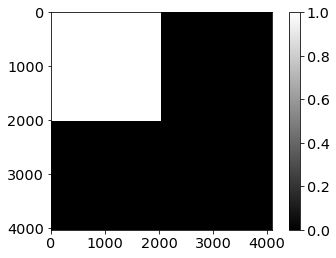

In [24]:
a = np.load(output_path)
plt.imshow(a['CCD1'].T, cmap='gray')
plt.colorbar()
plt.show()